# Group 16 : Chandana Budaati(1002087323), Sanjana Potluri(1002147971), Deepthi Burada(1002034183), Varshith Konduru(1002132051)

In [43]:
# Import the required library
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [44]:
# Import the h5py
import h5py

# Load the dataset
with h5py.File('usps.h5', 'r') as hf:
        train = hf.get('train')
        X_train = train.get('data')[:]
        y_train = train.get('target')[:]
        test = hf.get('test')
        X_test = test.get('data')[:]
        y_test = test.get('target')[:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7291, 256), (7291,), (2007, 256), (2007,))

# Changing Different K for KNN Classifier

In [45]:

sc = [] # List to store accuracy
l = []      # List to store k values
#Checking with different k values
for k in range(1,25):
    l.append(k)
    #Create KNN Classifier
    neigh = KNeighborsClassifier(n_neighbors=k) 
    neigh.fit(X_train,y_train) # Train the KNN Classifier on the training set
    y_pred = neigh.predict(X_test) # Predict the X_test score and store in y_pred
    accuracy = accuracy_score(y_test, y_pred=y_pred)
    sc.append(accuracy)# Accuracy Calculation

In [46]:
#Display of accuracys
for k, accuracys in zip(l, sc):
    print(f"For k={k}, the accuracy is {accuracys}")

For k=1, the accuracy is 0.9436970602889886
For k=2, the accuracy is 0.9412057797708022
For k=3, the accuracy is 0.9446935724962631
For k=4, the accuracy is 0.9431988041853513
For k=5, the accuracy is 0.9446935724962631
For k=6, the accuracy is 0.9387144992526159
For k=7, the accuracy is 0.9417040358744395
For k=8, the accuracy is 0.9407075236671649
For k=9, the accuracy is 0.9372197309417041
For k=10, the accuracy is 0.9357249626307922
For k=11, the accuracy is 0.9312406576980568
For k=12, the accuracy is 0.9307424015944196
For k=13, the accuracy is 0.929745889387145
For k=14, the accuracy is 0.9292476332835077
For k=15, the accuracy is 0.9302441454907823
For k=16, the accuracy is 0.9272546088689586
For k=17, the accuracy is 0.9257598405580468
For k=18, the accuracy is 0.9217737917289487
For k=19, the accuracy is 0.9227703039362232
For k=20, the accuracy is 0.9177877428998505
For k=21, the accuracy is 0.9192825112107623
For k=22, the accuracy is 0.9192825112107623
For k=23, the accura

# Cross Validation 

In [47]:
# Cross Validation 
cv_values = []
for i in range(2,25):
    neigh = KNeighborsClassifier(n_neighbors = 10)
    cv_values = cross_val_score(estimator=neigh, X=X_train, y=y_train, scoring='accuracy', cv=i, n_jobs=-1)
    mean = cv_values.mean()
    print(f"Cross_validation results for {i} folds is {mean}")

Cross_validation results for 2 folds is 0.9422572569522042
Cross_validation results for 3 folds is 0.9496634407309789
Cross_validation results for 4 folds is 0.9518577566922957
Cross_validation results for 5 folds is 0.9546006011596345
Cross_validation results for 6 folds is 0.9551489964623494
Cross_validation results for 7 folds is 0.9563832945215456
Cross_validation results for 8 folds is 0.9572063004313748
Cross_validation results for 9 folds is 0.9580301039039679
Cross_validation results for 10 folds is 0.9585784617697353
Cross_validation results for 11 folds is 0.9567971274031343
Cross_validation results for 12 folds is 0.9578930207520447
Cross_validation results for 13 folds is 0.9595407043936455
Cross_validation results for 14 folds is 0.9595418257366435
Cross_validation results for 15 folds is 0.9591271551420613
Cross_validation results for 16 folds is 0.9595385699826489
Cross_validation results for 17 folds is 0.9598161596512339
Cross_validation results for 18 folds is 0.95981

# Confusion Matrix

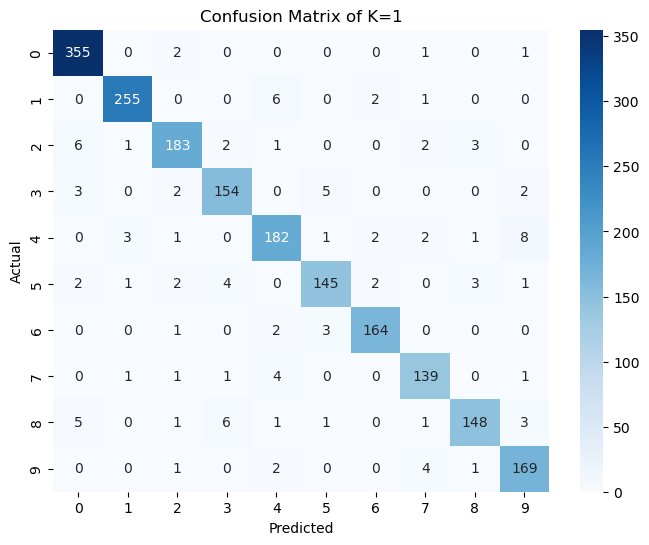

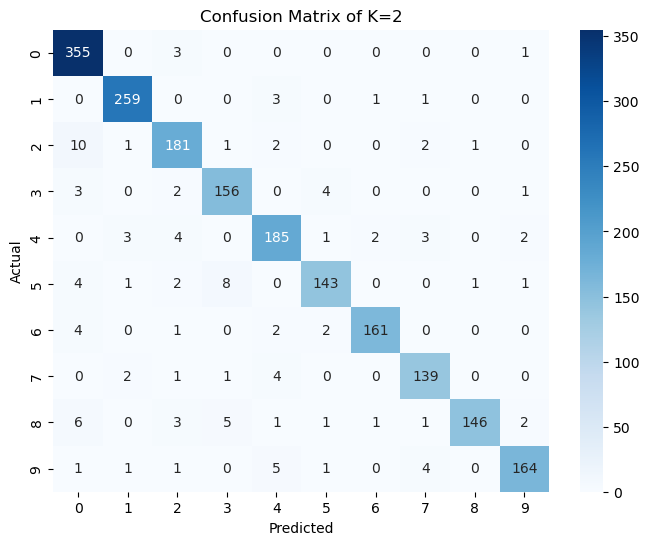

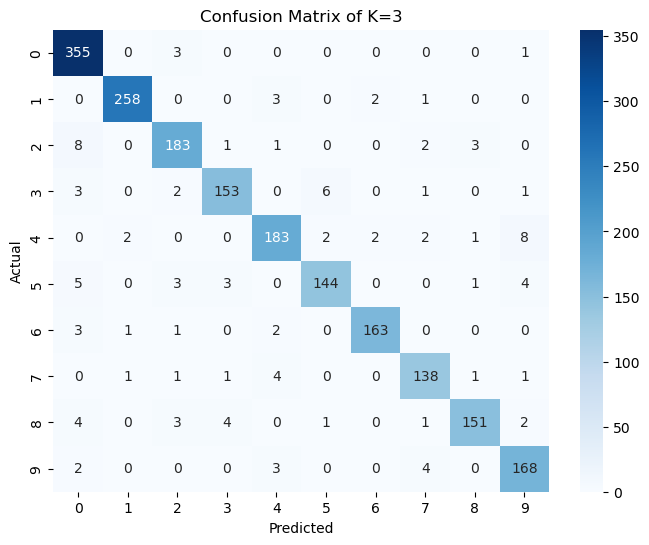

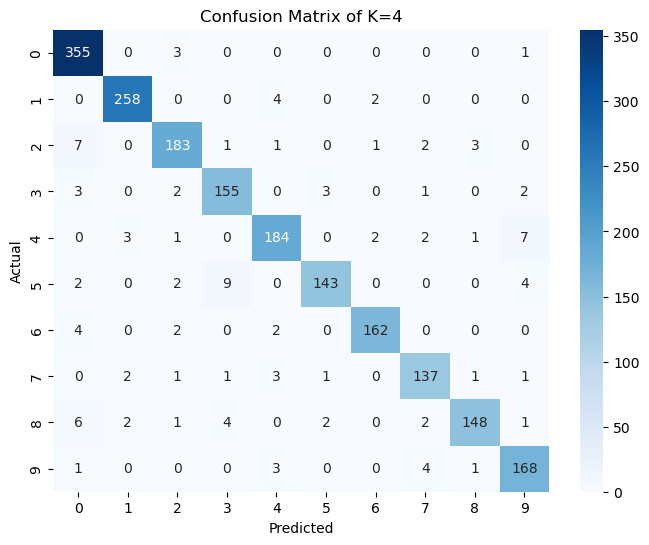

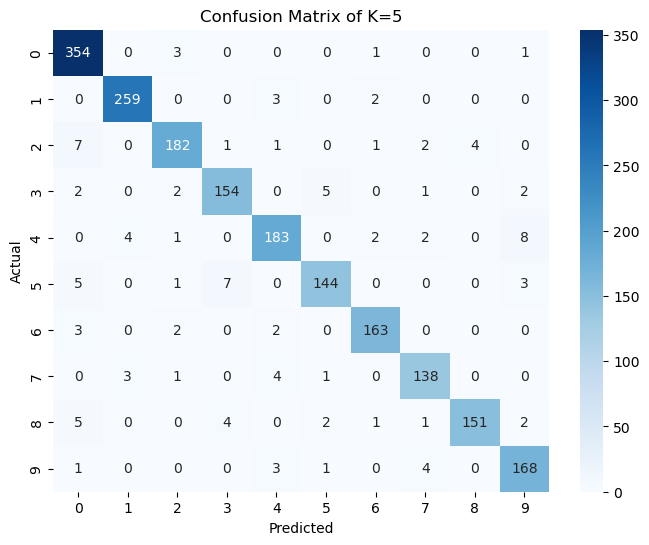

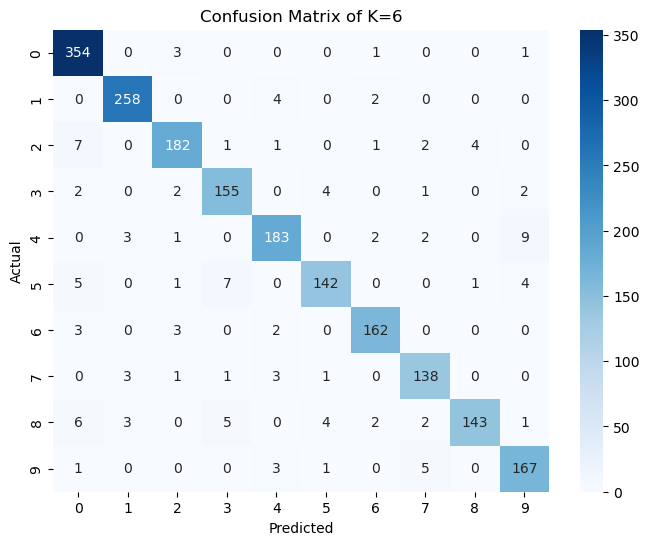

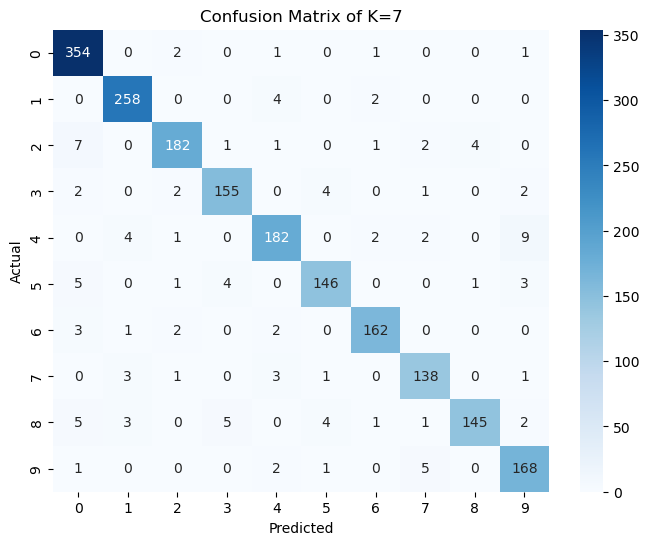

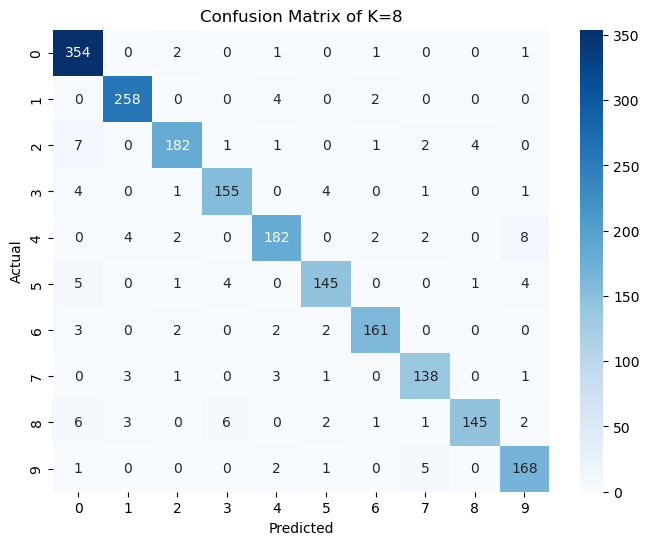

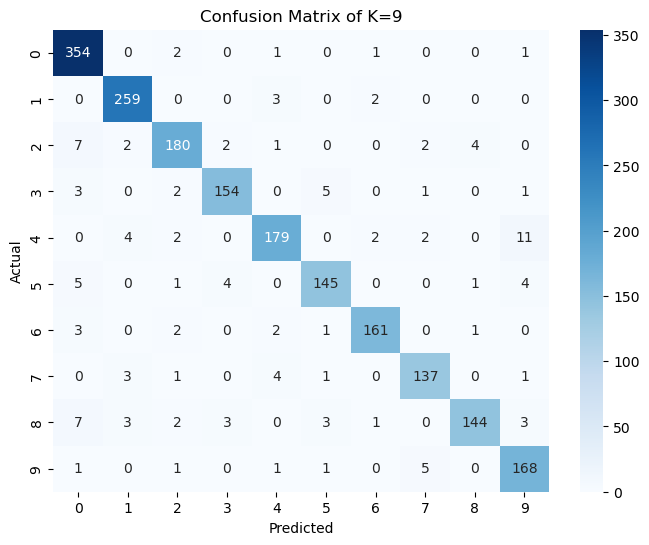

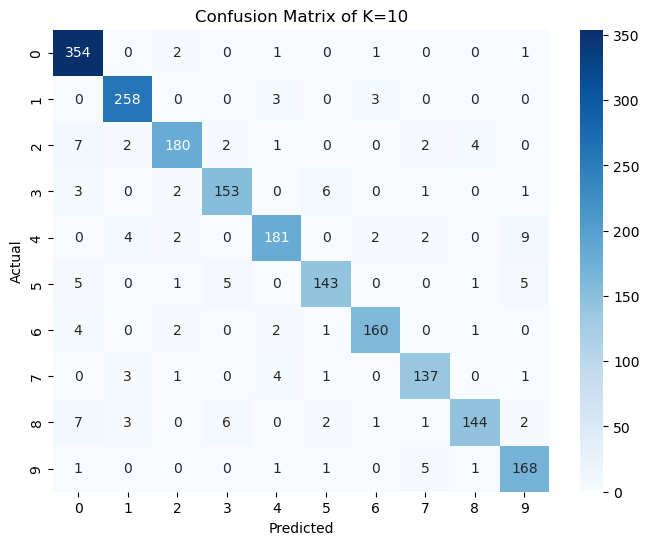

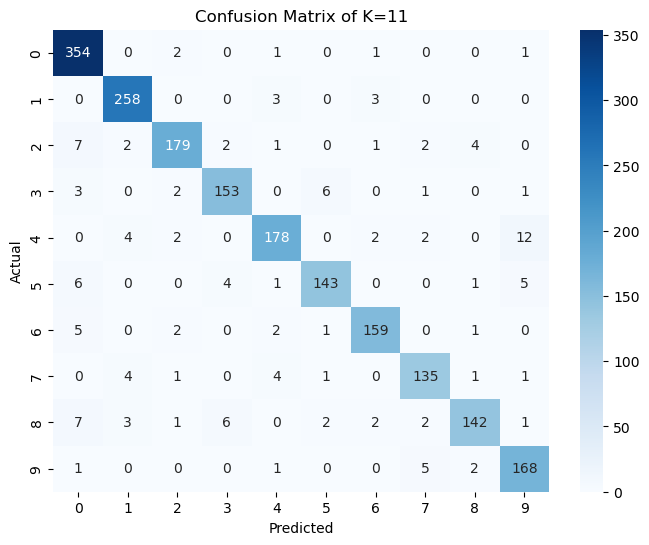

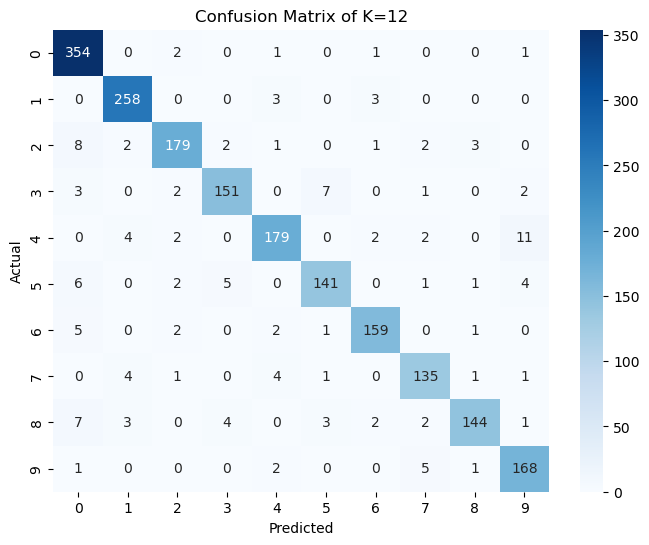

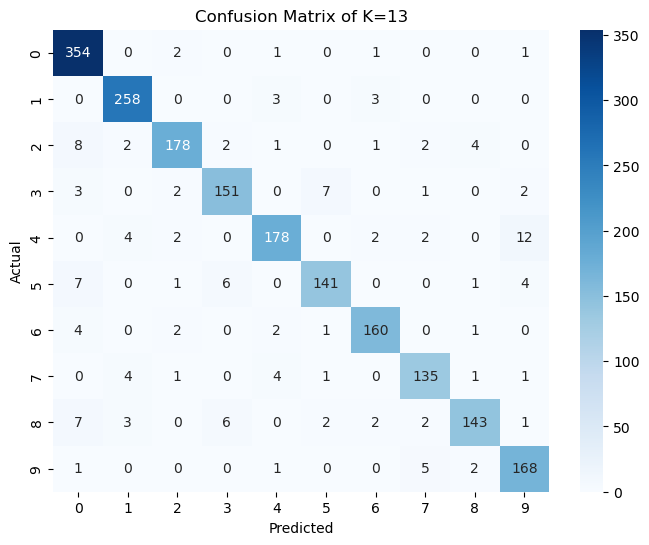

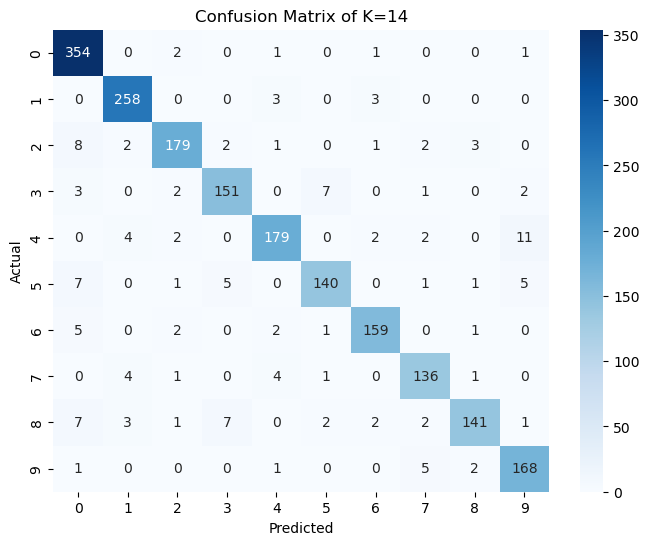

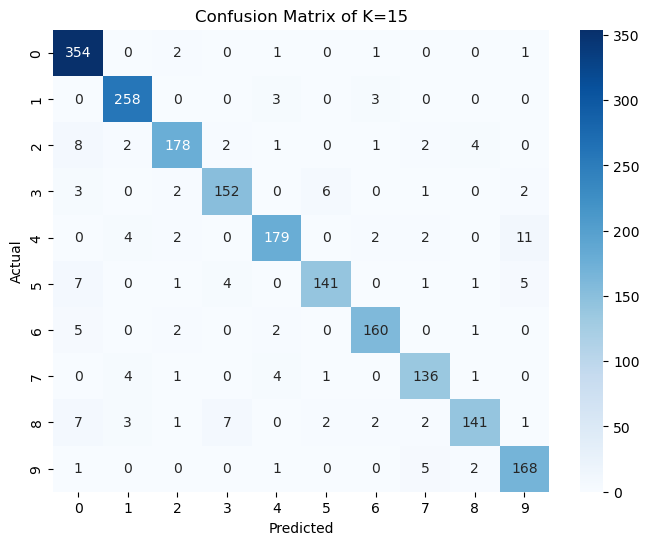

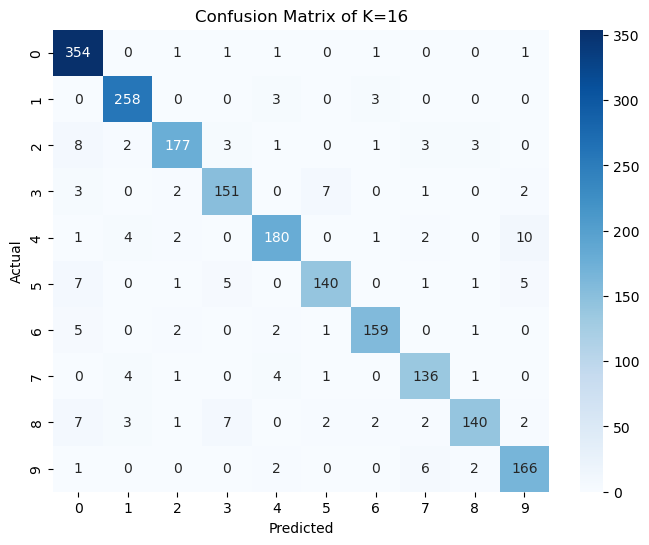

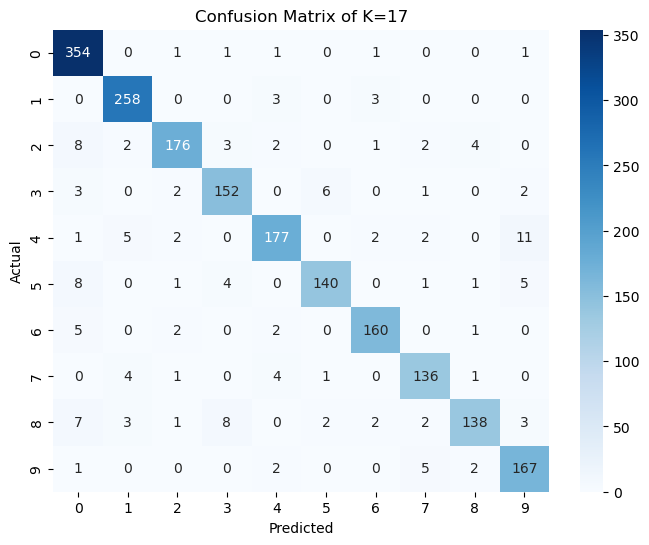

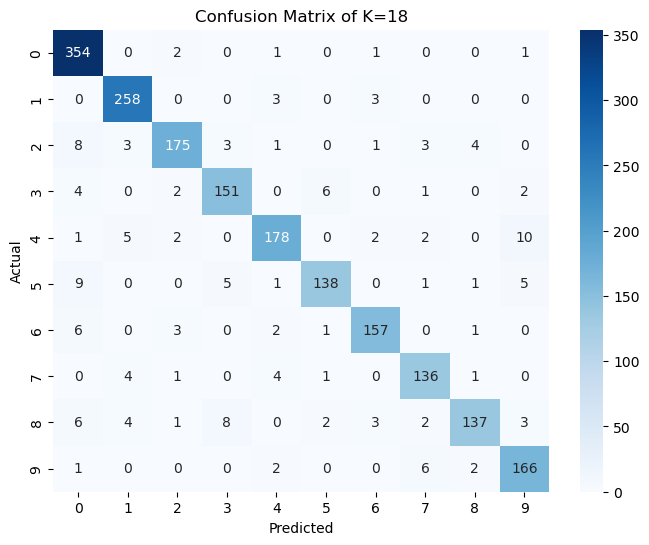

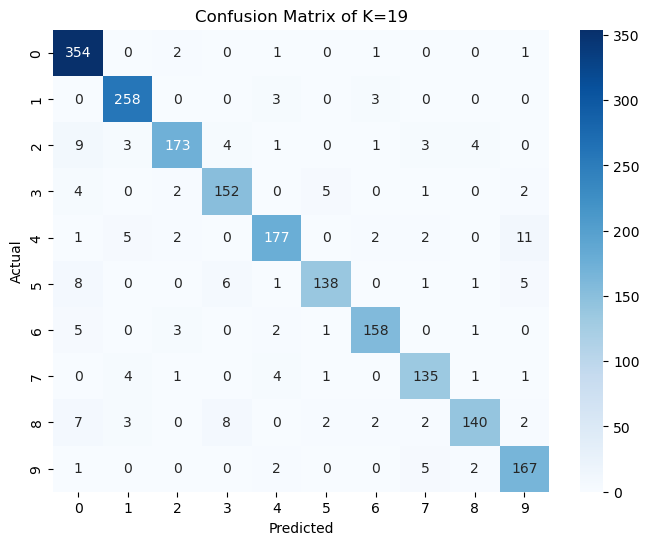

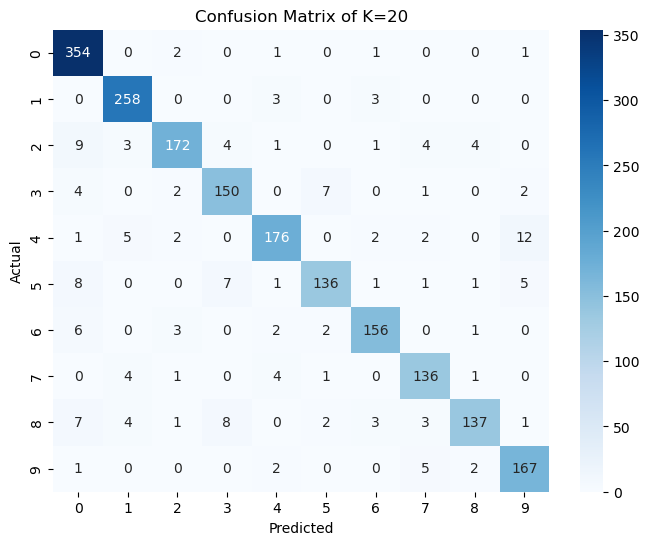

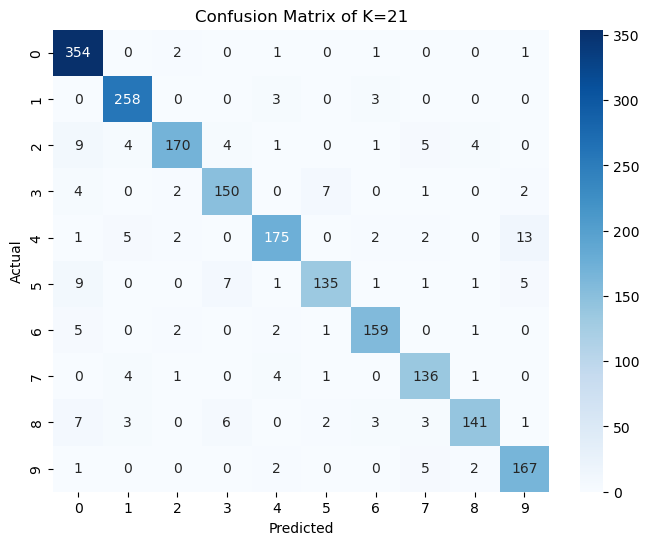

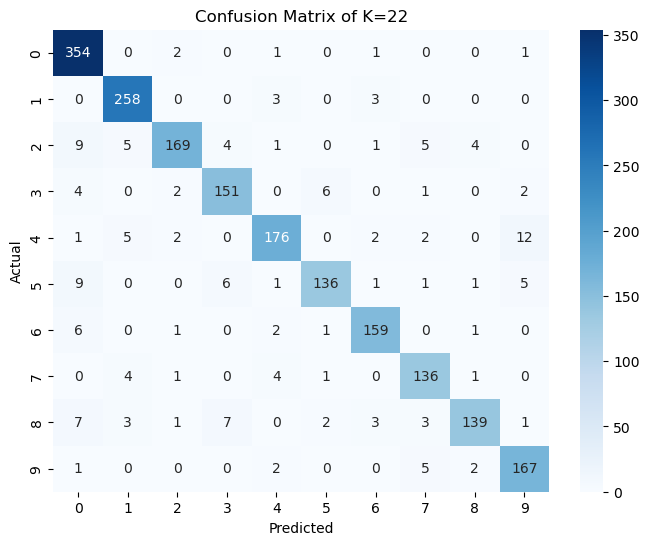

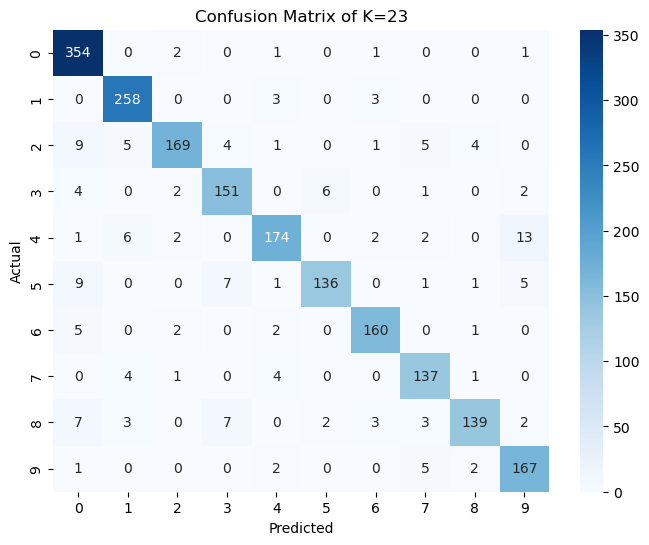

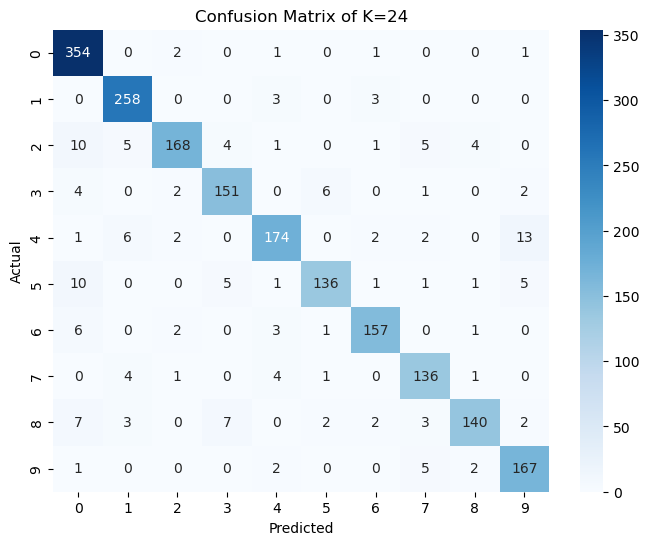

In [48]:
for k in range(1,25):
    #Create KNN Classifier
    neigh = KNeighborsClassifier(n_neighbors=k) 
    neigh.fit(X_train,y_train) # Train the KNN Classifier on the training set
    y_pred = neigh.predict(X_test) # Predict the X_test score and store in y_pred
    cm = confusion_matrix(y_test, y_pred) # Calculate the confusion_matrix
    class_labels = np.unique(np.concatenate((y_test, y_pred))) # Find the class_labels
    # Plot the confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of K={k}")
    plt.show()

# Precision and Recall

In [49]:
for k in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors=k) 
    neigh.fit(X_train,y_train) # Train the KNN Classifier on the training set
    y_pred = neigh.predict(X_test) # Predict the X_test score and store in y_pred
    precision=precision_score(y_test, y_pred=y_pred,average=None) # Calculate the precision score
    recall=recall_score(y_test, y_pred=y_pred,average=None) # Calculate the recall_score
    print(f"For K={k}, Precision={precision,}, Recall={recall,}") # Print Recall and precision
    


For K=1, Precision=(array([0.95687332, 0.97701149, 0.94329897, 0.92215569, 0.91919192,
       0.93548387, 0.96470588, 0.92666667, 0.94871795, 0.91351351]),), Recall=(array([0.98885794, 0.96590909, 0.92424242, 0.92771084, 0.91      ,
       0.90625   , 0.96470588, 0.94557823, 0.89156627, 0.95480226]),)
For K=2, Precision=(array([0.92689295, 0.97003745, 0.91414141, 0.9122807 , 0.91584158,
       0.94078947, 0.97575758, 0.92666667, 0.98648649, 0.95906433]),), Recall=(array([0.98885794, 0.98106061, 0.91414141, 0.93975904, 0.925     ,
       0.89375   , 0.94705882, 0.94557823, 0.87951807, 0.92655367]),)
For K=3, Precision=(array([0.93421053, 0.98473282, 0.93367347, 0.94444444, 0.93367347,
       0.94117647, 0.9760479 , 0.9261745 , 0.96178344, 0.90810811]),), Recall=(array([0.98885794, 0.97727273, 0.92424242, 0.92168675, 0.915     ,
       0.9       , 0.95882353, 0.93877551, 0.90963855, 0.94915254]),)
For K=4, Precision=(array([0.93915344, 0.97358491, 0.93846154, 0.91176471, 0.93401015,
    

In [50]:
# Choose K = 5 because it has best cross validation score and does not lead to overfitting
best_k = 5
neigh = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1) # Use KNeighborsClassifier for K=5
neigh.fit(X_train,y_train) # fit the model

KNeighborsClassifier(n_jobs=-1)

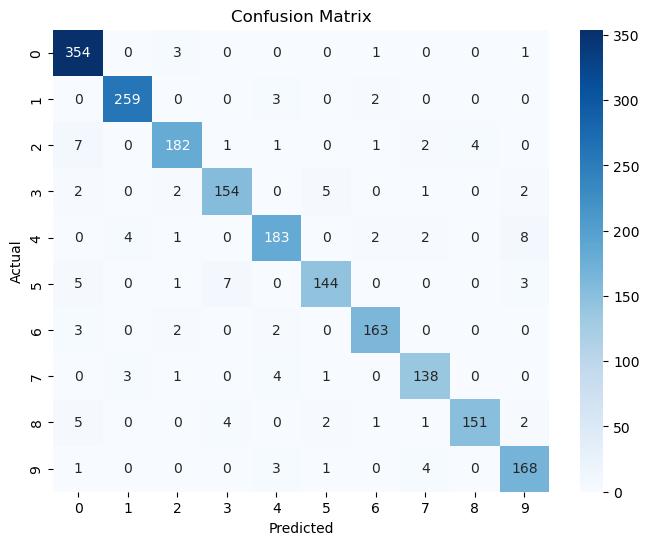

In [51]:

y_pred = neigh.predict(X_test) # Predict the X_test score and store in y_pred


cm = confusion_matrix(y_test, y_pred) # Calculate the confusion_matrix


class_labels = np.unique(np.concatenate((y_test, y_pred))) #Find the class_labels

# Plot the confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
precision_score(y_test, y_pred=y_pred,average=None) # Print the precision score

array([0.93899204, 0.97368421, 0.94791667, 0.92771084, 0.93367347,
       0.94117647, 0.95882353, 0.93243243, 0.97419355, 0.91304348])

In [53]:
recall_score(y_test, y_pred=y_pred,average=None) # Print the recall_score

array([0.98607242, 0.98106061, 0.91919192, 0.92771084, 0.915     ,
       0.9       , 0.95882353, 0.93877551, 0.90963855, 0.94915254])

# Hog Image feature Extraction and KNN Classifier

In [54]:
# Import the required library
import numpy as np
from skimage.feature import hog
from skimage import exposure
hog_feat = []

orientations = 8  #Declaring Number of orientation bins
pixels_per_cell = (2, 2)  #Setting Cell size in pixels 
cells_per_block = (2, 2)  #Setting Number of cells per block 

# Define hog features in X_train
for image in X_train:
    features = hog(
        image.reshape((16, 16)),
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block) 
    hog_feat.append(features) # Append HOG features to hog_feat

hog_feat = np.array(hog_feat) # Assign hog_feat array to hog_feat

hog_te = [] # Empty List

In [55]:
# Define hog features in X_test
for image in X_test:
    features = hog(
        image.reshape((16, 16)),
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block)

    hog_te.append(features) # Append HOG features


Accuracy of K=3 is 0.9377179870453413


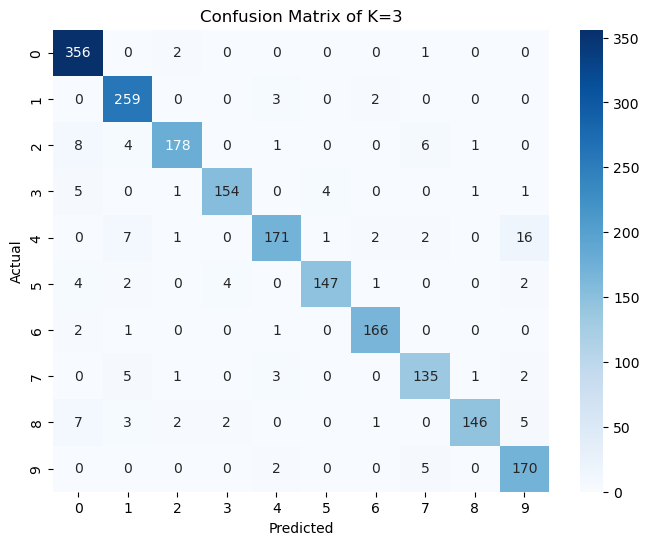

For K=3, Precision=(array([0.93193717, 0.92170819, 0.96216216, 0.9625    , 0.94475138,
       0.96710526, 0.96511628, 0.90604027, 0.97986577, 0.86734694]),), Recall=(array([0.99164345, 0.98106061, 0.8989899 , 0.92771084, 0.855     ,
       0.91875   , 0.97647059, 0.91836735, 0.87951807, 0.96045198]),)
Accuracy of K=5 is 0.9367214748380668


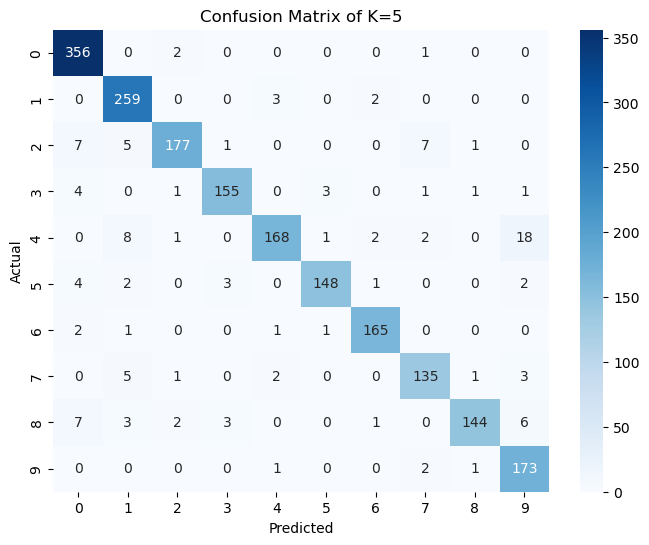

For K=5, Precision=(array([0.93684211, 0.91519435, 0.96195652, 0.95679012, 0.96      ,
       0.96732026, 0.96491228, 0.91216216, 0.97297297, 0.85221675]),), Recall=(array([0.99164345, 0.98106061, 0.89393939, 0.93373494, 0.84      ,
       0.925     , 0.97058824, 0.91836735, 0.86746988, 0.97740113]),)
Accuracy of K=7 is 0.9367214748380668


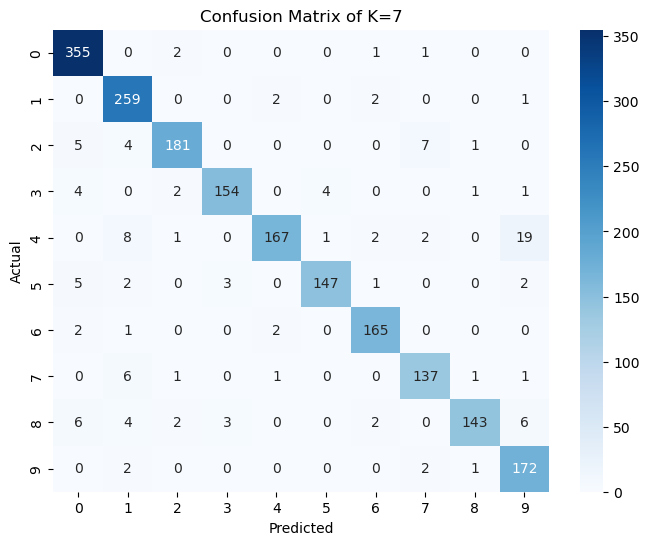

For K=7, Precision=(array([0.94164456, 0.90559441, 0.95767196, 0.9625    , 0.97093023,
       0.96710526, 0.95375723, 0.91946309, 0.97278912, 0.85148515]),), Recall=(array([0.98885794, 0.98106061, 0.91414141, 0.92771084, 0.835     ,
       0.91875   , 0.97058824, 0.93197279, 0.86144578, 0.97175141]),)
Accuracy of K=9 is 0.9342301943198804


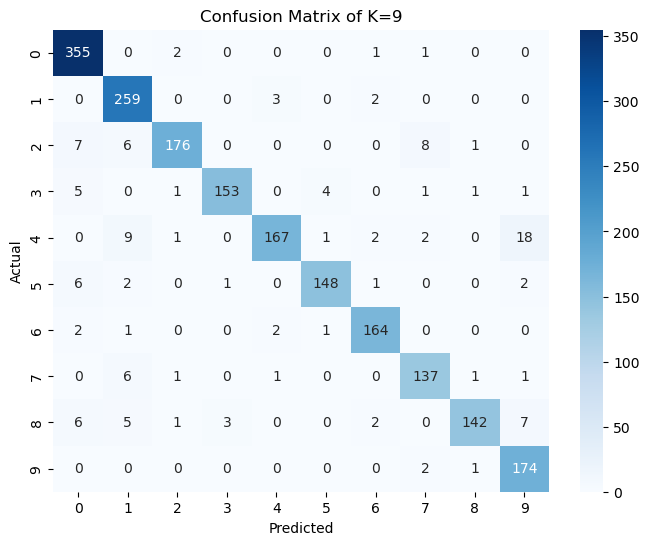

For K=9, Precision=(array([0.93175853, 0.89930556, 0.96703297, 0.97452229, 0.96531792,
       0.96103896, 0.95348837, 0.90728477, 0.97260274, 0.85714286]),), Recall=(array([0.98885794, 0.98106061, 0.88888889, 0.92168675, 0.835     ,
       0.925     , 0.96470588, 0.93197279, 0.85542169, 0.98305085]),)
Accuracy of K=11 is 0.9337319382162431


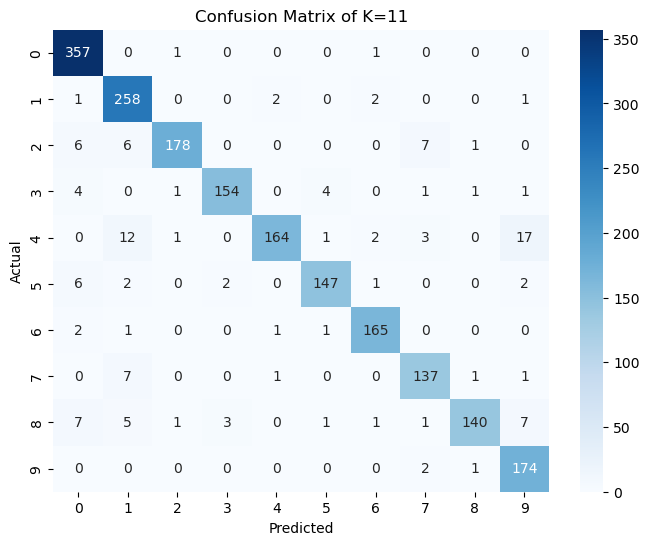

For K=11, Precision=(array([0.93211488, 0.88659794, 0.97802198, 0.96855346, 0.97619048,
       0.95454545, 0.95930233, 0.90728477, 0.97222222, 0.85714286]),), Recall=(array([0.99442897, 0.97727273, 0.8989899 , 0.92771084, 0.82      ,
       0.91875   , 0.97058824, 0.93197279, 0.84337349, 0.98305085]),)
Accuracy of K=13 is 0.9272546088689586


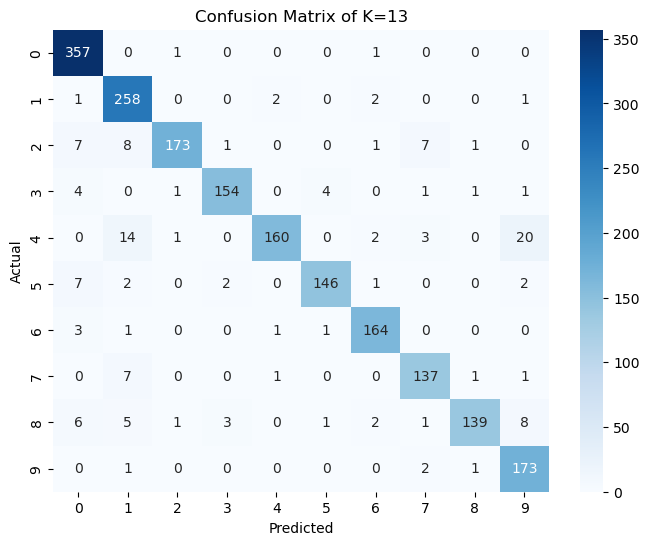

For K=13, Precision=(array([0.92727273, 0.87162162, 0.97740113, 0.9625    , 0.97560976,
       0.96052632, 0.94797688, 0.90728477, 0.97202797, 0.83980583]),), Recall=(array([0.99442897, 0.97727273, 0.87373737, 0.92771084, 0.8       ,
       0.9125    , 0.96470588, 0.93197279, 0.8373494 , 0.97740113]),)
Accuracy of K=15 is 0.9282511210762332


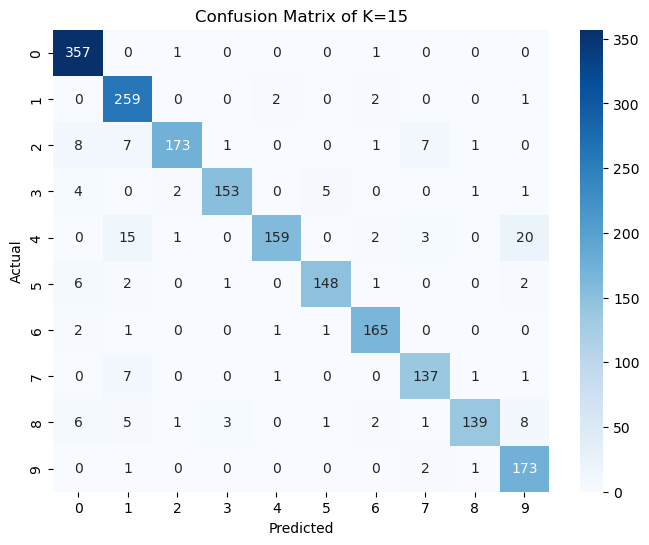

For K=15, Precision=(array([0.93211488, 0.87205387, 0.97191011, 0.96835443, 0.97546012,
       0.95483871, 0.94827586, 0.91333333, 0.97202797, 0.83980583]),), Recall=(array([0.99442897, 0.98106061, 0.87373737, 0.92168675, 0.795     ,
       0.925     , 0.97058824, 0.93197279, 0.8373494 , 0.97740113]),)
Accuracy of K=17 is 0.9252615844544095


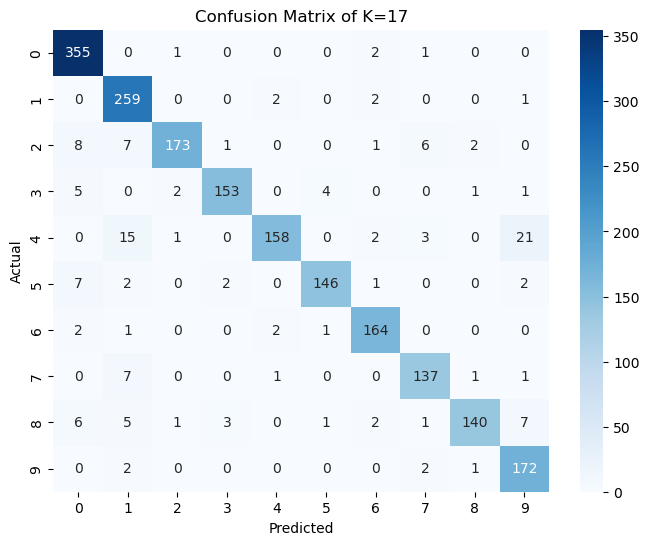

For K=17, Precision=(array([0.92689295, 0.86912752, 0.97191011, 0.96226415, 0.96932515,
       0.96052632, 0.94252874, 0.91333333, 0.96551724, 0.83902439]),), Recall=(array([0.98885794, 0.98106061, 0.87373737, 0.92168675, 0.79      ,
       0.9125    , 0.96470588, 0.93197279, 0.84337349, 0.97175141]),)


In [56]:
scores = [] # Empty list
l = []      # Empty list 'l'
# Define different k values
knn = [3, 5, 7, 9, 11, 13, 15, 17]

for k in knn:
    l.append(k)
    neigh = KNeighborsClassifier(n_neighbors=k) # KNN Classifier
    neigh.fit(hog_feat,y_train) # Train the KNN Classifier
    y_pred = neigh.predict(hog_te) # Predict the hog_te score 
    scores.append(neigh.score(hog_te,y_test))# Accuracy 
    accuracy = accuracy_score(y_test, y_pred=y_pred)
    print(f"Accuracy of K={k} is {accuracy}")
    cm = confusion_matrix(y_test, y_pred) # confusion_matrix
    class_labels = np.unique(np.concatenate((y_test, y_pred))) # class_labels
    # Plot confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted") # Xlabel
    plt.ylabel("Actual")    # Ylabel
    plt.title(f"Confusion Matrix of K={k}") # Title
    plt.show()
    precision=precision_score(y_test, y_pred=y_pred,average=None) # Calculate Precision
    recall=recall_score(y_test, y_pred=y_pred,average=None)       # Calculate Recall
    print(f"For K={k}, Precision={precision,}, Recall={recall,}") # Print Precision and Recall